# Bootstrapping to estimate parameter ranges of nonlinear models

When we first introduced ourselves to regression, we focused the regression algorithm’s ability to find the “truth”, i.e. how close to the true parameter values does the algorithm get.

In statistics and boostrapping, the truth is (typically) unknown and there is noise associated with any given measurement. So our question becomes “how confident am I that the parameters of my model are not zero?” And as discussed in class, all kinds of challenges arise when using bootstrapping. Here, we'll try a simple example.

Let's consider one of our equations for bacterial growth:
\begin{align}
\dot{y} = \frac{y^3}{a+y^3}-by
\end{align}

where y is the concentration of bacterium and a and b are parameters that help define the rate of bacterial growth and loss, respectively. 

You have been provided with data, called "Homework11 Data.csv". Use this data for the following excercises. In this file, you'll find the time points sampled and the concentration of bacterium (y) for 5 independent experiments. We will consider data to be independent across time and experiments.

## Part 1: Plot data and perform initial fitting

In the space below, load the data and write the code to fit the parameters of our model to the data using minimize or fsolve. You may want to revisit your previous homeworks. To make things a little easier, I'll give you the first guess for your parameter. Go with (a,b) = (0.3,0.8). After fitting:
   - clearly indicate what were the parameter values and the value of the cost function you implemented.
   - Plot on one plot the data and the fitted model's response

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint 
from scipy.optimize import minimize

In [2]:
file_dat = pd.read_csv('Homework 6 data.csv')
dfdat = pd.DataFrame(file_dat)
dat = pd.DataFrame.to_numpy(dfdat)

In [27]:
#Converting data into individual lists

#print(dat)

time=np.zeros(4)
Exp1=np.zeros(4)
Exp2=np.zeros(4)
Exp3=np.zeros(4)
Exp4=np.zeros(4)
Exp5=np.zeros(4)
extra10=np.zeros(4)
extra20=np.zeros(4)
extra30=np.zeros(4)
extra50=np.zeros(4)

for i in range(len(dat)):
    time[i] = dat[i][0]
    Exp1[i] = dat[i][1]
    Exp2[i] = dat[i][2]
    Exp3[i] = dat[i][3]
    Exp4[i] = dat[i][4]
    Exp5[i] = dat[i][5]


###Values to be used later
extra10 = dat[0][1:]
extra20 = dat[1][1:]
extra30 = dat[2][1:]
extra50 = dat[3][1:]
extras = [list(extra10),list(extra20),list(extra30),list(extra50)]

exp_dat = [list(Exp1),list(Exp2),list(Exp3),list(Exp4),list(Exp5)]

In [4]:
exp_avs = np.zeros(4)
sumt = np.zeros(4)
for i in range(4):
    sumt[i] = Exp1[i]+Exp2[i]+Exp3[i]+Exp4[i]+Exp5[i]
    exp_avs[i] = sumt[i]/5
    
print(exp_avs)

[ 6.688  9.214  9.85  10.43 ]


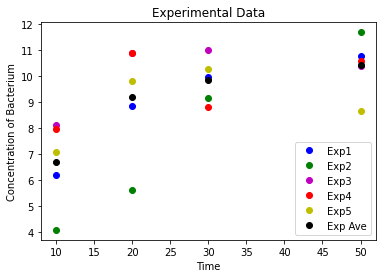

In [5]:
#Initial scatter plot of data
plt.plot(time,Exp1,'bo');
plt.plot(time,Exp2,'go');
plt.plot(time,Exp3,'mo');
plt.plot(time,Exp4,'ro');
plt.plot(time,Exp5,'yo');
plt.plot(time,exp_avs,'ko');
plt.legend(['Exp1','Exp2','Exp3','Exp4','Exp5','Exp Ave']);
plt.title('Experimental Data')
plt.ylabel('Concentration of Bacterium');
plt.xlabel('Time');

In [6]:
def f(x,t,a,b):

    y = x
    dydt = y**3/(a+y**3)-b*y
    
    return dydt

ic = 2

####THIS WORKS BUT NOT FOR WHAT I NEED
# def RMSE(params):
#     a, b = params;
#     ODE_output = odeint(f, ic, time, args = (a,b));
#     ODE_out_new = np.zeros(4)
#     for n in range(len(ODE_output)):
#         ODE_out_new[n] = ODE_output[n]
#     #print(ODE_out_new)
#     err = exp_dat[i] - ODE_out_new
#     return np.sqrt(np.sum(err**2))  # we return the summed squared error directly

####THIS WILL BE USED FOR THE REST OF THE PROBLEM
def RMSE(params):
    a, b = params;
    ODE_output = odeint(f, ic, time, args = (a,b));
    ODE_out_new = np.zeros(4)
    for n in range(len(ODE_output)):
        ODE_out_new[n] = ODE_output[n]
    #print(ODE_out_new)
    err = exp_avs - ODE_out_new
    return np.sqrt(np.sum(err**2))  # we return the summed squared error directly

#RMSE([.3,.8])

### Doing some data type conversion that is probably over complicated but works

In [7]:
# print(i)
# sol = minimize(RMSE, x0 = (0.3,0.8));
# print(sol)
# my_a = np.zeros(5)
# my_b = np.zeros(5)
# results = [[],[],[],[],[]]

# for i in range(5):
#     sol[i] = minimize(RMSE, x0 = (0.3,0.8));
#     #print(sol[i]);

#     # collect prediction or fitted output
#     my_a[i],my_b[i] = sol[i].x
#     fitted_output = list(odeint(f, ic, time, args = (my_a[i],my_b[i])));
#     results[i] = fitted_output
#     #RMSE((.43,8,2.8))


sol = minimize(RMSE, x0 = (0.3,0.8));
my_a,my_b = sol.x
fitted_output = list(odeint(f, ic, time, args = (my_a,my_b)));


In [8]:
## # print(results)
# empty = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
# for i in range(5):
results = np.zeros(4)
for i in range(4):
    results[i] = fitted_output[i][0]

# my_fit_dat = empty

# print(my_fit_dat)


print(results)

[ 2.          8.09406707 10.21539051 11.46661055]


### Plotting the data with model fit

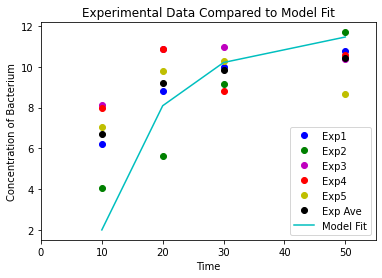

In [9]:
plt.plot(time,Exp1,'bo');
plt.plot(time,Exp2,'go');
plt.plot(time,Exp3,'mo');
plt.plot(time,Exp4,'ro');
plt.plot(time,Exp5,'yo');
plt.plot(time,exp_avs,'ko');

plt.plot(time,results,'c')

plt.legend(['Exp1','Exp2','Exp3','Exp4','Exp5','Exp Ave','Model Fit']);
plt.title('Experimental Data Compared to Model Fit')
plt.ylabel('Concentration of Bacterium');
plt.xlabel('Time');
plt.xlim([0,55]);

## Part 2: Use sampling with replacement to create distributions of parameters that fit the data

Our hypothesis is that both a and b are greater than 0. Use the bootstrap method to create distributions of estimates of our parameter values. We can do this by, **for each iteration:**
   - Resample the data at each time point using sample with replacement (search online how to do).
   - Use minimize to refit the model to the resampled data
   - Save the fitted parameter estimates and the value of the cost function.
   
Do this for at least 200 iterations. HINT: this code may take a long time to run. It would be best to get the code working with only a few iterations. And once happy, then try 200. After completing, plot histograms of the fitted parameter values and cost function values. Figures must be clearly labeled and obvious to read. 

Based on these data, what is the p value for the null hypothesis that a and b are equal to zero? Calculate the one sided p value, based on the idea that we expect them to be greater than zero.
   

### For this segment, I will be using the minimum value of time = 10 and the maximum value of time = 50 among the five experiments for the bounds of the random data samples

In [14]:
import random

In [121]:
#em_list = [[0,0,0,0]]*200
# sol2 = em_list
# my_a2 = np.zeros(len(sol2))
# my_b2 = np.zeros(len(sol2))

counter = 200

alist = np.zeros(counter)
blist = np.zeros(counter)
costlist = np.zeros(counter)

results2 = [[0,0,0,0]]*counter

exp_avs = np.zeros(4)

# for i in range(4):
#     exp_avs[i] = random.uniform(np.min(extras[i]),np.max(extras[i]))

for i in range(counter):
    for j in range(4):
        exp_avs[j] = random.uniform(np.min(extras[j]),np.max(extras[j]))
    
    sol2 = minimize(RMSE, x0 = (0.3,0.8));

    my_a2,my_b2 = sol2.x
    cost = sol2.fun
    
    alist[i] = my_a2
    blist[i] = my_b2
    costlist[i] = cost
    fitted_output = odeint(f, ic, time, args = (my_a2,my_b2));
    results2[i] = fitted_output
    
#print(results2)

In [122]:
#Making a list of lists out of the above data
testing = [[0,0,0,0]]
for i in range(counter-1):
    testing.append([0,0,0,0])

#print(testing)

for i in range(counter):
    for j in range(4):
        testing[i][j] = results2[i][j][0]

new_results = testing
#print(new_results)

### Histograms for results

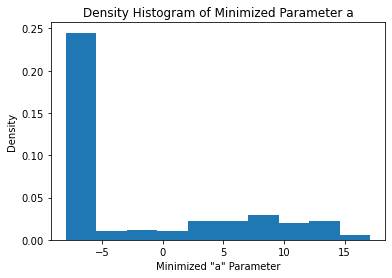

In [149]:
plt.hist(alist,density = True, bins = 10);
plt.ylabel('Density');
plt.xlabel('Minimized "a" Parameter');
plt.title('Density Histogram of Minimized Parameter a');

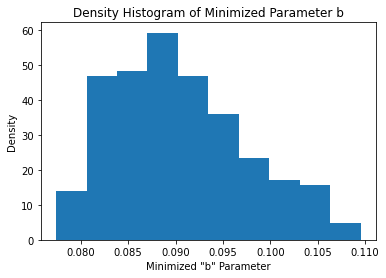

In [150]:
plt.hist(blist,density = True, bins = 10);

plt.ylabel('Density');
plt.xlabel('Minimized "b" Parameter');
plt.title('Density Histogram of Minimized Parameter b');

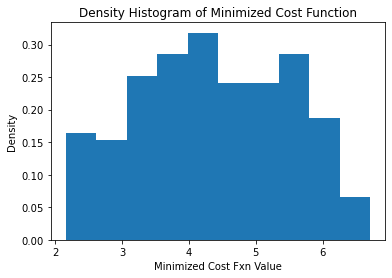

In [151]:
plt.hist(costlist,density = True,bins = 10);
plt.ylabel('Density');
plt.xlabel('Minimized Cost Fxn Value');
plt.title('Density Histogram of Minimized Cost Function');

### Analyzing P values for each result

In [154]:
p_val_a = np.sum(alist > 0)/len(alist);
p_val_b = np.sum(blist > 0)/len(blist);

In [156]:
print('The chances of getting an "a" parameter that is greater than zero is p =',p_val_a)
print('The chances of getting a "b" parameter that is greater than zero is p =',p_val_b)

The chances of getting an "a" parameter that is greater than zero is p = 0.32
The chances of getting a "b" parameter that is greater than zero is p = 1.0


## Part 3 Analyze fit results

One a single figure, plot the model's response vs time for all 200 estimates of the parameter values. Are the fits reasonable? Should any of the fits be discounted? Why so? Does this change how you define your p values above? **Defend your answer here and include any plots as necessary:**



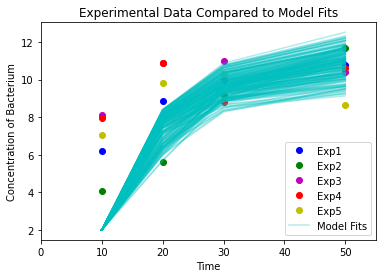

In [123]:
plt.plot(time,Exp1,'bo');
plt.plot(time,Exp2,'go');
plt.plot(time,Exp3,'mo');
plt.plot(time,Exp4,'ro');
plt.plot(time,Exp5,'yo');

for i in range(counter):
    plt.plot(time,new_results[i],'c',alpha=0.3)

plt.legend(['Exp1','Exp2','Exp3','Exp4','Exp5','Model Fits']);
plt.title('Experimental Data Compared to Model Fits')
plt.ylabel('Concentration of Bacterium');
plt.xlabel('Time');
plt.xlim([0,55]);

The fits provide a reasonable analysis of an expected curve based on experimental data. However, it is clear that they are not ideal. The lower most fits have more error at lower values of time. Perhaps these should be discounted to promote more accuracy at earlier times in the model. As a result, our p values above might change in that we would instead test for an "a" parameter that is less than zero. When evaluating the "a" parameter's histogram of results, one can observe that there is a sharp collection of values that are less than -5.0. Therefore, evaluating the likelihood that the parameters are less than zero may give a better indication of the accurate results.

# Project Material

#### For my project, I will be comparing air quality data and total deaths divided by total positive cases of COVID. Further, I will evaluate whether having a steel mill in a specific county increased its deaths per positive case.

#### I will be looking for a specific state where there are a high number of steel mills ( e.g., Indiana, Pennsylvania), and air quality will be quantified by NOx concentrations either on a specific day or as a yearly average.